# Plots for Island Divider Scripts

In [1]:
# Import required dependencies
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd

# Add the parent directory to sys.path
parent_dir = os.path.abspath("..")
sys.path.insert(0, parent_dir)

# Import custom modules
import divider

# Configure matplotlib
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1(np.linspace(0, 1, 10)))

# constants
FIGURE_SAVE_LOCATION = "../data/figures/04design/"
FIGURE_PREFILE = "divider_"

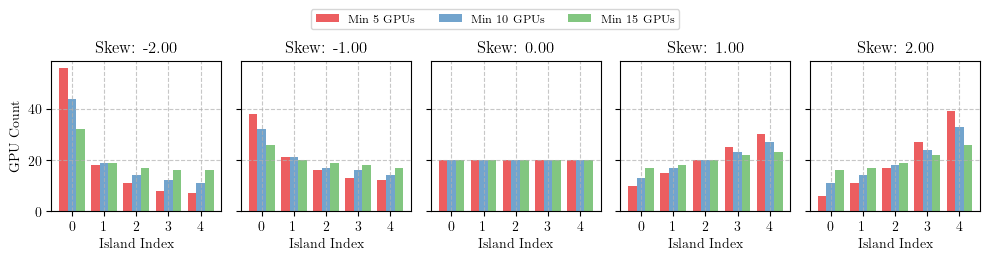

In [ ]:
def plot_skew_effects_overlay_chart(
    total_gpus: int, 
    min_gpu_per_island_values: list[int], 
    num_islands_fixed: int, 
    skew_values_to_plot: list[float]
):
    num_skews = len(skew_values_to_plot)
    fig, axes = plt.subplots(1, num_skews, figsize=(10, 2.5), sharey=True)
    if num_skews == 1:
        axes = [axes]

    # Define colors for different min_gpu_per_island values
    colors = plt.cm.Set1(np.linspace(0, 1, 10))
    labels = []
    bar_width = 0.8 / len(min_gpu_per_island_values)

    for i, skew in enumerate(skew_values_to_plot):
        for j, min_gpu_per_island in enumerate(min_gpu_per_island_values):
            sizes = divider.island_divider(
                total_gpus_for_type=total_gpus,
                num_islands_target=num_islands_fixed,
                size_distribution_skew_exponent=skew,
                min_island_size=min_gpu_per_island
            )
            if not sizes:  # Should not happen if num_islands_fixed is reasonable
                print(f"Warning: No sizes generated for skew {skew} with {num_islands_fixed} islands and min {min_gpu_per_island}.")
                continue

            island_indices = np.arange(len(sizes)) + j * bar_width - (len(min_gpu_per_island_values) - 1) * bar_width / 2
            bar = axes[i].bar(
                island_indices, sizes, 
                alpha=0.7, color=colors[j], width=bar_width
            )
            if i == 0:
                labels.append((bar[0], f'Min {min_gpu_per_island} GPUs'))
        
        axes[i].set_title(f'Skew: {skew:.2f}')
        axes[i].set_xlabel('Island Index')
        if i == 0:
            axes[i].set_ylabel('GPU Count')
        axes[i].set_xticks(range(len(sizes)))
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Add a shared legend
    handles, legend_labels = zip(*labels)
    fig.legend(handles, legend_labels, loc='upper center', ncol=len(min_gpu_per_island_values), fontsize='small', bbox_to_anchor=(0.5, 1.05))

    plt.tight_layout(rect=[0, 0, 1, 0.96])

# Call the function with overlayed charts
plot_skew_effects_overlay_chart(
    total_gpus=100,
    min_gpu_per_island_values=[5, 10, 15],
    num_islands_fixed=5,
    skew_values_to_plot=[-2.0, -1.0, 0.0, 1.0, 2.0]
)
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}skew_effects_overlay_islands.pdf", bbox_inches='tight')
